# TEST TECHNIQUE NALIA

## Consigne

Ce test technique Nalia est un test de Machine Learning visant à évaluer vos compétences à travers un mini projet de ML.

**L'objectif est de prédire la note (Rating) d'une App présente dans le Google Play Store.**

Vous avez à disposition 2 jeux de données : 
- Un détaillant les spécificités d'une App
- Un regroupant les commentaires laissés par les internautes sur l'App

Pour ces 2 datasets, le nom des colonnes est assez intuitif est ne devrait pas poser de problèmes de compréhension. Si toutefois c'était le cas n'hésitez pas à me contacter par mail pour plus de précisions. 

**La seule consigne est d'essayer d'obtenir le meilleur score possible** pour votre modèle en utilisant comme méthode de scoring le MSE (Mean Squared Error) et comme répartition de split en le train et le test 33%.

Vous êtes libres d'utiliser qu'un seul des 2 datasets ainsi que d'appliquer toutes les transformations que vous souhaitez aux colonnes. 

Il est attendu comme rendu ce jupyter notebook, avec un code commenté, clair et lisible. 

Vous devez l'envoyer par mail à leo@eiffo-analytics.com avec en object "Test Technique Nalia - NOM PRENOM"

Si vous avez la moindre question n'hésitez pas à me la poser à leo@eiffo-analytics.com

Bonne chance !

## Developpement

Prepared by **Anass El Houd**. Friday 11 Sep 2020.
* [Website](https://aelhoud.me)
* [Medium profile](https://towardsdatascience.com/@anass.elhoud)
* [Github profile](https://towardsdatascience.com/@anass.elhoud)

#### Recapitulation of the entire developpement

The study is divided into 4 parts: 
* Part 1: The step of prepocessing. We clean the data, play and transform all the elements and columns according to their formats and types.
* Part 2: In this part, we visualize the data, its distribution and different correlations. 
* Part 3: We start building the models based on the previous parts. I chose 3 models to work with: Random Forest Regressor and XGboost Regressor.
* Part 4: Perspectives: we suggest some more sophisticated ideas to develop our analysis if we have further time. 

In [254]:
import pandas as pd
apps = pd.read_csv('GooglePlayApp.csv')
reviews = pd.read_csv('GooglePlayAppReview.csv')

In [256]:
apps.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4.1
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4.5
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.3


In [257]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8281 entries, 0 to 8280
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8281 non-null   object 
 1   Category        8281 non-null   object 
 2   Reviews         8281 non-null   object 
 3   Size            8281 non-null   object 
 4   Installs        8281 non-null   object 
 5   Type            8281 non-null   object 
 6   Price           8281 non-null   object 
 7   Content Rating  8280 non-null   object 
 8   Genres          8281 non-null   object 
 9   Last Updated    8281 non-null   object 
 10  Current Ver     8277 non-null   object 
 11  Android Ver     8278 non-null   object 
 12  Rating          8281 non-null   float64
dtypes: float64(1), object(12)
memory usage: 841.2+ KB


### **Part 1**:  Preprocessing, Cleaning and playing with data

In [218]:
import matplotlib.pyplot as plt
import numpy as np

In [219]:
apps['Rating'].value_counts()

4.3     912
4.4     909
4.5     862
4.2     816
4.6     694
4.1     629
4.0     517
4.7     448
3.9     361
3.8     287
5.0     271
3.7     226
4.8     221
3.6     167
3.5     156
3.4     126
3.3     100
4.9      86
3.0      81
3.1      69
3.2      63
2.9      45
2.8      40
2.6      24
2.7      23
2.3      20
2.5      20
2.4      19
1.0      16
2.2      14
2.0      12
1.9      11
2.1       8
1.7       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
19.0      1
Name: Rating, dtype: int64

We notice that there is a **unreasonable rating** in our data (19.0). In general, the Apps rating is between 0 and 5 stars. We delete this value to avoid biasing our model.
We can replace it with 1.9 if we think it was a typing mistake, but since we can't be sure and we have no direct contact with the data owner, it is better to delete it.

In [220]:
apps=apps[apps['Rating'] <=5]

We also remove all the dupliacte apps and we check the number of apps we have before and after deleting the duplicates:

In [221]:
print('Number of apps at the beginning:', len(apps))

Number of apps at the beginning: 8280


In [222]:
apps.drop_duplicates(subset='App', inplace=True)
print('Number of apps after removing duplicates:', len(apps))

Number of apps after removing duplicates: 8196


We count the number of NaN:

In [223]:
print('----Number of NaN in the data----')
print(apps.isna().sum())

----Number of NaN in the data----
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
Rating            0
dtype: int64


We have 4 NaN in column "Current Ver" and 2 NaN in "Android Ver". I thought of two solutions:
* The easiest solution is to remove the 6 lines since we have no way to replace them (because the version columns are non numerical) or delete the entire column if not interesting.
* Converting the two versions columns into numerical and replacing the NaN values with the median.

I think that dropping the three two columns (**Current Ver**, **Android Ver** and **Last Updated** ) is recommended since these two columns are unecessary for our analysis. 

In [224]:
apps.drop(labels = ['Current Ver','Android Ver','Last Updated'], axis = 1, inplace = True)

We recapitulate the dropping and cleaning part in the figure below: 

![Alt](https://i.ibb.co/cDh6NWb/Capture-d-e-cran-2020-09-12-a-12-09-28.png)

We play with data (arrange and make it numerical) so we can use it corectly aftet (step of visualization and correlations):

In [225]:
apps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In order to visualize the data, we have to convert it into numerical. The conversion is done by replacing all the string and transforming them in different ways to numerical format. In the figure below, we recapitulate all the cleaning, scaling and conversions steps.

We recapitulate all the steps in the figure below:

![Alt](https://i.ibb.co/HdBPTZ8/Capture-d-e-cran-2020-09-13-a-22-29-43.png)

We start with cleaning the ****Size**** column:

In [226]:
apps['Size'] = apps['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
apps['Size'] = apps['Size'].apply(lambda x: str(x).replace('Varies with device', 'nan') if 'Varies with device' in str(x) else x)
#Scaling all the values to Millions format (means that 19.0 => 19x10^6 => 19M)
apps['Size'] = apps['Size'].apply(lambda x: float(str(x).replace('k', ''))/1000 if 'k' in str(x) else x)
apps['Size'] = apps['Size'].apply(lambda x : float(x))
apps = apps[pd.notnull(apps['Size'])]

Now, we pass to "****Price****" column:

In [227]:
apps['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [228]:
#Delete "$" from each price to convert it to numerical
apps['Price'] = apps['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)
apps['Price'] = apps['Price'].apply(lambda x : float(x))

Cleaning ****Installs****" column:

In [229]:
apps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [230]:
apps['Installs'] = apps['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
apps['Installs'] = apps['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
apps['Installs'] = apps['Installs'].apply(lambda x : float(x))

In [231]:
apps['Reviews'] = apps['Reviews'].apply(lambda a: float(a))
apps['Rating'] = apps['Rating'].apply(lambda x: float(x))

For other columns, we use some categorical data encoders. We will mention about that in details when we start preparing the data for the ML models. We use **LabelEncoder** that converts any element into numeric values.

In [232]:
apps['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Adventure;Action & Adventure', 'Arcade',
       'Casual', 'Card', 'Casual;Pretend Play', 'Strategy', 'Action',
       'Puzzle', 'Sports', 'Word', 'Racing', 'Casual;Creativity',
       'Simulation', 'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Simulation;Education', 'Action;Action & Adventure',
       'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Education

****Type, Genres, Content Rating**** columns:

In [233]:
from sklearn import preprocessing

apps['Type'] = pd.get_dummies(apps['Type'])
enc = preprocessing.LabelEncoder()
apps['Genres'] = enc.fit_transform(apps['Genres'])
apps['Content Rating'] = enc.fit_transform(apps['Content Rating'])

The column "App", that contains the name of the apps, has no effect on the model prediction. So I think it should be dropped from the dataset.

In [234]:
apps.drop(labels = ['App'], axis = 1, inplace = True)

****Category**** column:

We use the dummy variable encoding for Categories.

In [20]:
apps['Category'] = pd.get_dummies(apps['Category'])

### **Part 2**:  Visuliazing and checking the correlations

In [22]:
import seaborn as sns

We visualize at the beginning the distribution of the "**apps ratings**" and the distribution of the "**apps size**" using Seaborn. So let's take a look at it and check for normality, and try to correct it otherwise...

- Total number of ratings: 7027
- Mean of distribution of rating : 4.160623310089655
- Standard deviation: 0.5591057007040927


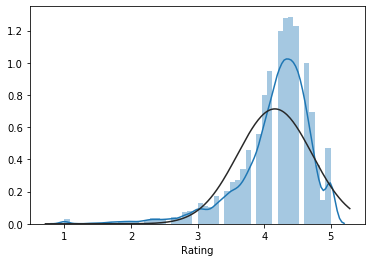

In [49]:
from scipy.stats import norm
sns.distplot(apps['Rating'],fit=norm)
print('- Total number of ratings:', len(apps['Rating']))
print('- Mean of distribution of rating :', np.mean(apps['Rating']))
print('- Standard deviation:', np.std(apps['Rating']))

We notice that "the fit" of the dataset **rating** doesn't follow -technically- a normal distribution with a <span style="color:yellow">mean of 4.16</span>  and a <span style="color:yellow">standard deviation of 0.559</span>. This information will give a helping hand in defining and developping the model after. Let's check the probability plot:

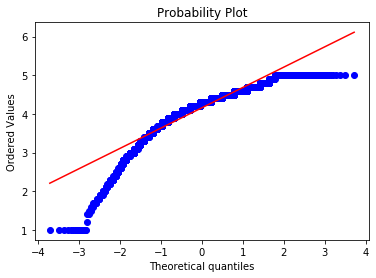

In [59]:
from scipy import stats
fig = plt.figure()
prob = stats.probplot(apps['Rating'], plot=plt)

So, certainly not normal: we have skewness. I thought of doing some transformations in order to fit a gaussian distribution. Let's apply a Box-Cox transformation on the data and see what happens...
The Box-Cox transformation is as follows:
$$
BC(x, \lambda)=\left\{\begin{array}{ll}
\frac{x^{\lambda}-1}{\lambda} & \text { si } \lambda \neq 0 \\
\log (x) & \text { si } \lambda=0
\end{array}\right.
$$


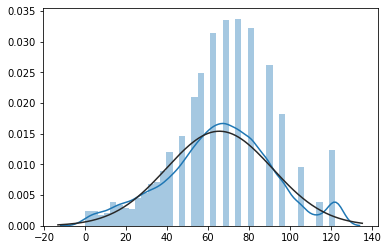

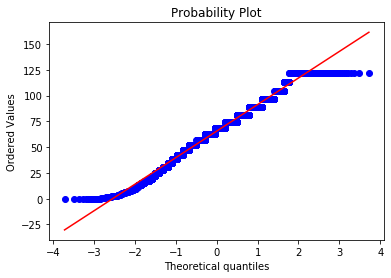

In [57]:
from scipy.stats import boxcox
bcx_target, lam =boxcox(apps['Rating'])
sns.distplot(bcx_target,fit=norm);
fig = plt.figure()
prob = stats.probplot(bcx_target, plot=plt)

Much more like a gaussian (normal) distribution! 

We will be using this transformation for the rest of this project.

###### Let's try the same thing with the **Size column** :

- Total number of ratings: 7027
- Mean distribution: 21.754427280489537
- Standard deviation: 22.724885983849997


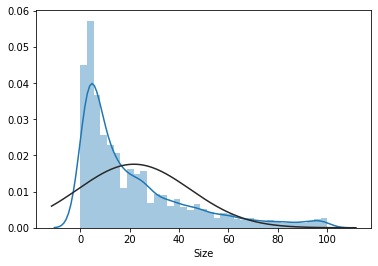

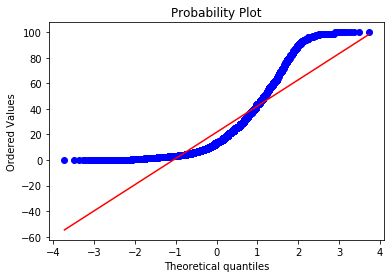

In [61]:
sns.distplot(apps['Size'],fit=norm)
print('- Total number of ratings:', len(apps['Size']))
print('- Mean distribution:', np.mean(apps['Size']))
print('- Standard deviation:', np.std(apps['Size']))
fig = plt.figure()
prob = stats.probplot(apps['Size'], plot=plt)

We can do the same as we did with the rating column: use a trasnfomation to fit the normal distribution. 

Next, we visualize the different correlations. This is a crucial step that helps us choosing the important features for our model. 
The correlation matrix is shown below:

In [25]:
apps.corr()

,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Rating
Reviews,1.000000,0.180522,0.595755,0.038898,-0.008994,0.056289,-0.016397,0.067589
Size,0.180522,1.000000,0.131766,0.016967,-0.025703,0.210481,-0.125223,0.063067
Installs,0.595755,0.131766,1.000000,0.046723,-0.010562,0.045480,-0.022044,0.047610
Type,0.038898,0.016967,0.046723,1.000000,-0.223314,0.031905,-0.002267,-0.043351
Price,-0.008994,-0.025703,-0.010562,-0.223314,1.000000,-0.012452,-0.004595,-0.021140
Content Rating,0.056289,0.210481,0.045480,0.031905,-0.012452,1.000000,-0.156124,0.034896
Genres,-0.016397,-0.125223,-0.022044,-0.002267,-0.004595,-0.156124,1.000000,-0.054739
Rating,0.067589,0.063067,0.047610,-0.043351,-0.021140,0.034896,-0.054739,1.000000


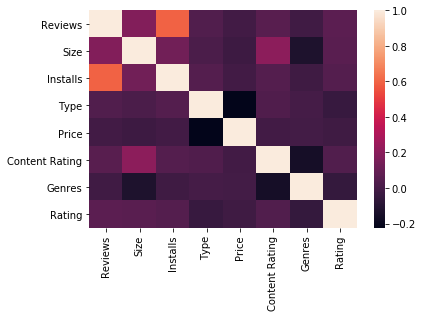

In [26]:
sns.heatmap(apps.corr())

##### Some remarks related to the correlations:
* It is obvious that the number of installs is highly correlated with number of reviews (k=0,59).
* The higher the price, the lower the rating with a correlation coefficient of 0,02.

### **Part 3**: Prediction Models

In [247]:
from sklearn.model_selection import train_test_split
chosen_features = ['Reviews', 'Size', 'Installs', 'Type','Category', 'Price', 'Content Rating', 'Genres']
X = apps[chosen_features]
y= bcx_target #transformed rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

#### 3-1- Random Forest Regressor 

In [248]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import auc, accuracy_score, mean_absolute_error, mean_squared_error

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)
y_rfpred = rf_reg.predict(X_test)

In [249]:
mse=mean_squared_error(inv_boxcox(y_test,lam), inv_boxcox(y_rfpred,lam))
mae=mean_absolute_error(inv_boxcox(y_test,lam), inv_boxcox(y_rfpred,lam))
print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)

Mean Squared Error: 0.26972585604862576
Mean Absolute Error: 0.3523156192134995


In the figure below, we have a better visualization of the actual and predicted rating by Random Forest Regressor.

Text(0, 0.5, 'Predicted Ratings')

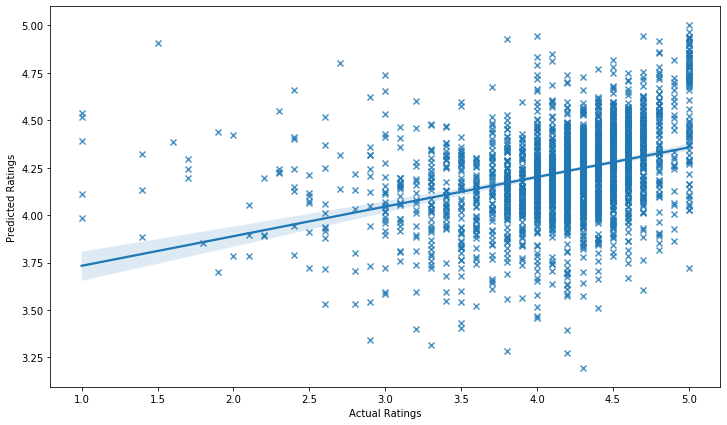

In [168]:
plt.figure(figsize=(12,7))
sns.regplot(inv_boxcox(y_test,lam),inv_boxcox(y_rfpred,lam), marker = 'x')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')

Now, let's visualize the effect of the number of estimators of the random forest on MSE:

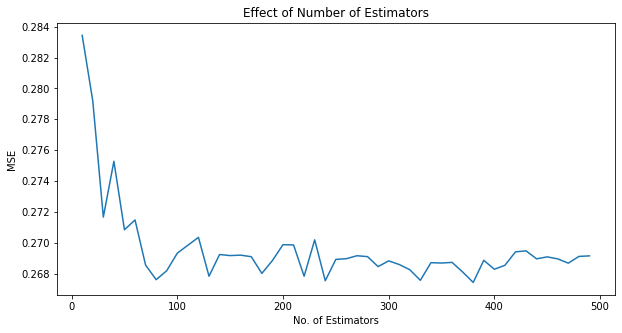

In [146]:
estimators = np.arange(10, 500, 10)
mse_list = []
for i in estimators:
    rf_reg.set_params(n_estimators=i)
    rf_reg.fit(X_train, y_train)
    y_rfpred = rf_reg.predict(X_test)
    mse_list.append(mean_squared_error(inv_boxcox(y_test,lam), inv_boxcox(y_rfpred,lam)))
plt.figure(figsize=(10, 5))
plt.xlabel("No. of Estimators")
plt.ylabel("MSE")
plt.title("Effect of Number of Estimators")
plt.plot(estimators, mse_list)

We get the lowest MSE for number of estimators around **370**. The lowest MSE is approximatively equal to **0,2697**.

#### 3-2-  XGboost model

In [251]:
chosen_features = ['Reviews', 'Size', 'Installs', 'Type', 'Category','Price', 'Content Rating', 'Genres']
X = apps[chosen_features]
y= bcx_target #transformed rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

xgb_model = xgb.XGBRegressor(random_state=102)
xgb_model.fit(X_train, y_train)

[21:56:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=102,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [252]:
y_xgpred = xgb_model.predict(X_test)
mse=mean_squared_error(inv_boxcox(y_test,lam), inv_boxcox(y_xgpred,lam))
print('Mean Squared Error:',mse)

Mean Squared Error: 0.26953637066678815


MSE of XGboost is approximatively equal to **0,2695**.

In the following figure, we compare the prediction performences of the two models (Random Forest and XGboost).

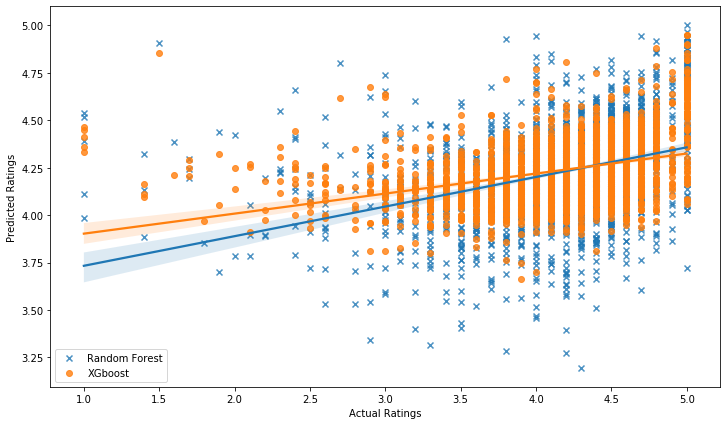

In [173]:
plt.figure(figsize=(12,7))
sns.regplot(inv_boxcox(y_test,lam),inv_boxcox(y_rfpred,lam),label = 'Random Forest', marker = 'x')
sns.regplot(inv_boxcox(y_test,lam),inv_boxcox(y_xgpred,lam),label = 'XGboost', marker = 'o')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()

####  Hyperparameters tuning using Grid Search

Let's try to tune the hyperparameters of our models to check if we can get lower errors. I will use the Randomized Search instead of Grid Search.

In [259]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    #'max_depth': range (2, 10, 1),
    'n_estimators': range(10, 500, 30),
    'learning_rate': [0.1, 0.01, 0.05]
}
search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, scoring="neg_mean_squared_error",cv=3)

search.fit(X_train,inv_boxcox(y_train,lam))
print("Best parameters found: ", search.best_param_)
print("Lowest MSE found: ", np.abs(search.best_score_))

/Users/anasselhoud/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 51 is smaller than n_iter=200. Running 51 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


[22:36:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[22:36:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[22:37:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_param_'

| Model       |     MSE    |        MAE |
| :------------ | :-------------: | -------------: |
| Random Forest Regressor   |     0.2697     | 0.348 |
| XGBoost Regressor |   0.2695    |   0.349 |

### **Part 4**: Perspectives

I stopped here in order to not make the developpement too long. Although, if I want to go further in this, I would have tried these two ideas:
* Trying some neural networks model (using Keras). I believe that if we have chosen thee best architecture for this problem, we would get good results.
* I would also get a hand on the second part of dataset, and apply NLP (Natural Language Processing) to predict the rating of an application based on the review comments of its users (by using all the NLP techniques like Tokenization, 
Text segmentation...)